The data contains a sample recordings taken simultaineously from the anterodorsal thalamus and the hippocampus and contains both a sleep and wake session. It contains both head-direction cells (i.e. cells that fire for a particular head direction in the horizontal plane) and place cells (i.e. cells that fire for a particular position in the environment).

Time (s)
0.00845      NaN
0.03265      NaN
0.13230      NaN
0.30340      NaN
0.32900      NaN
              ..
1186.12755   NaN
1189.38400   NaN
1194.13475   NaN
1196.20750   NaN
1196.67675   NaN
Length: 8764, dtype: float64


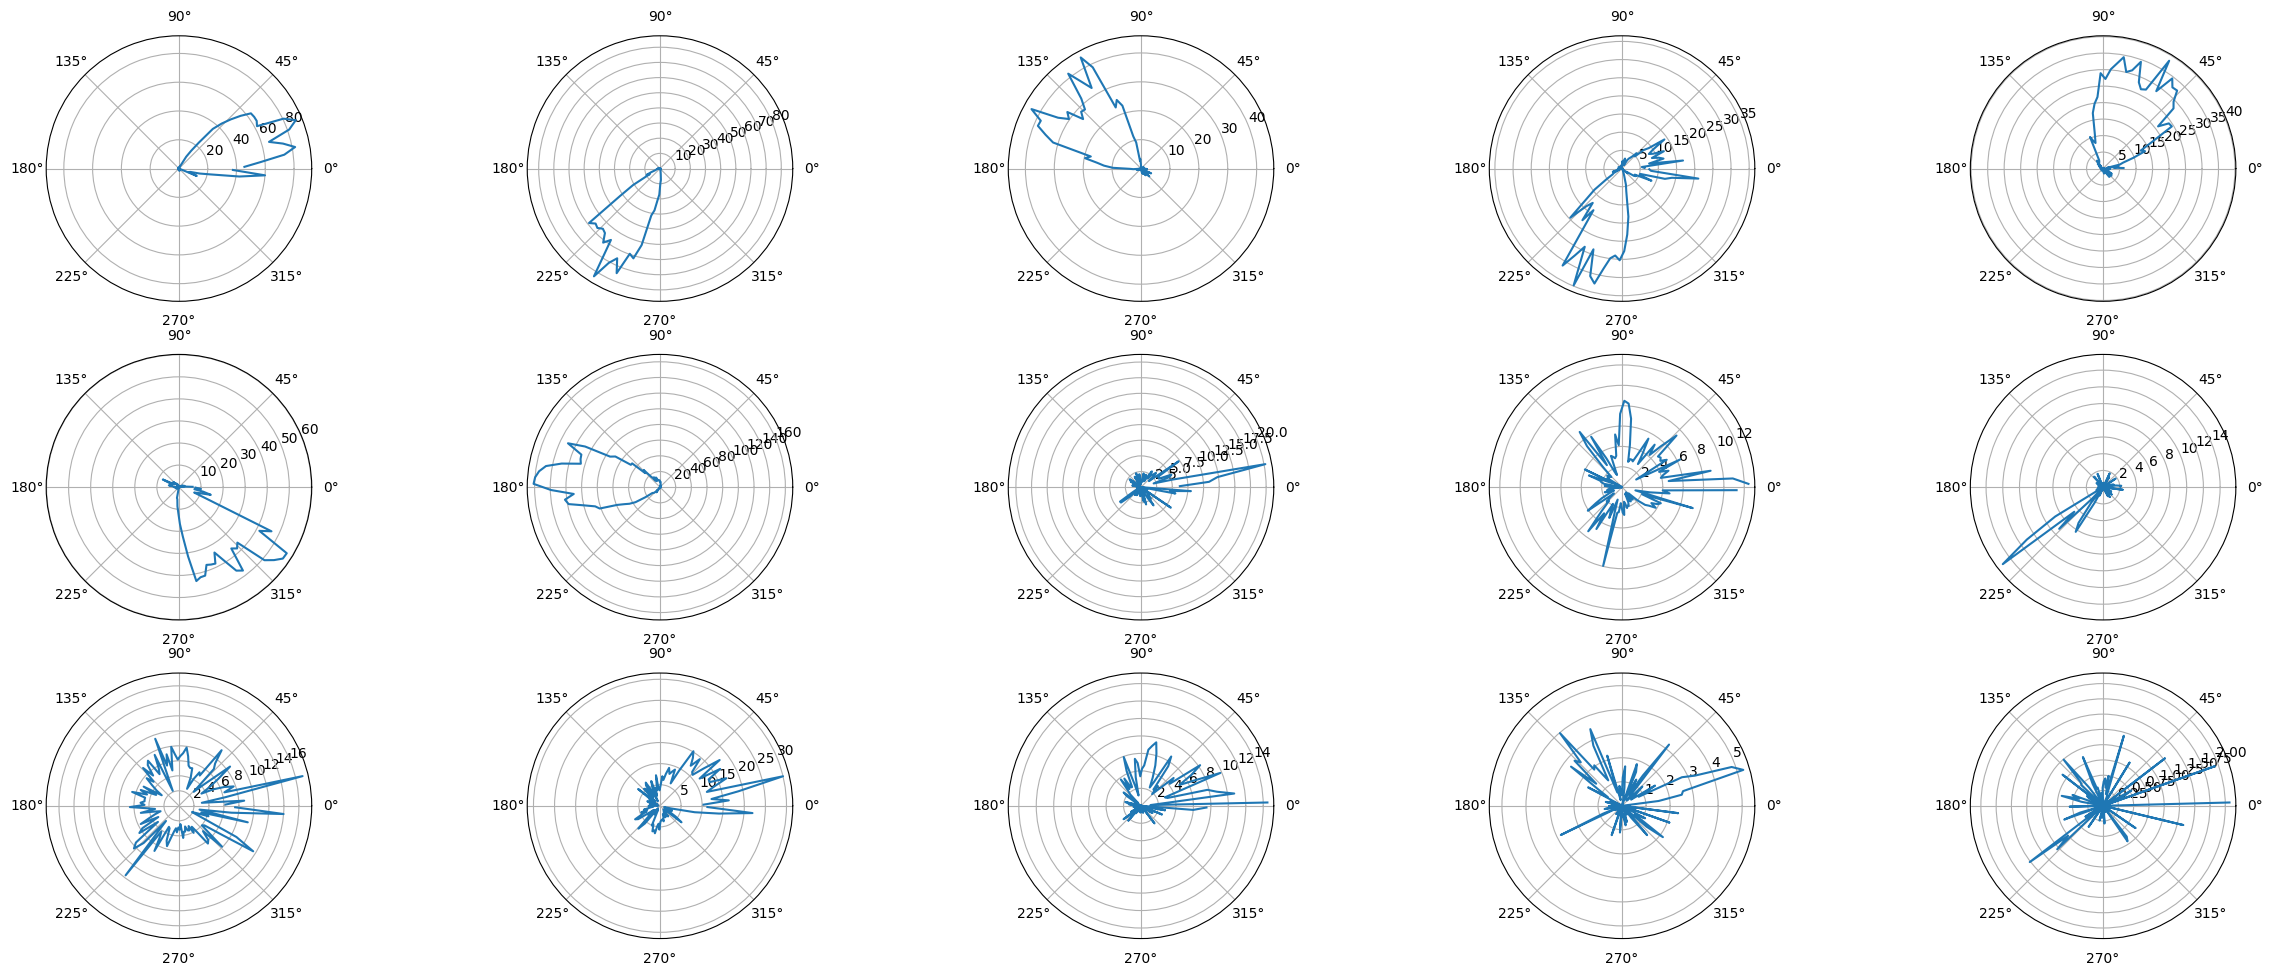

In [20]:
import numpy as np
import pandas as pd
import pynapple as nap
from matplotlib.pyplot import *
import matplotlib.pyplot as plt



data_directory = '/Users/leouying/Desktop/A2929-200711'

# LOADING DATA
data = nap.load_session(data_directory, 'neurosuite')

    #The object data contains the information about the session such as the spike times of all the neurons, 
    #the tracking data and the start and ends of the epochs. We can individually call each object.
spikes = data.spikes
position = data.position
wake_ep = data.epochs['wake']

#In this case, the TsGroup holds 15 neurons and it is possible to access, similar to a dictionnary, the spike times of a single neuron:
neuron_0 = spikes[0]
print(neuron_0)

# COMPUTING TUNING CURVES
tuning_curves = nap.compute_1d_tuning_curves(group = spikes, 
                                            feature = position['ry'], 
                                            ep = position['ry'].time_support, 
                                            nb_bins = 120,  
                                            minmax=(0, 2*np.pi) )
                                                

        
# PLOT
figure = plt.figure(figsize=(30, 20))
for i in spikes:
    subplot(5,5,i+1, projection = 'polar')
    plot(tuning_curves[i])
    

show()

1. SPIKE DATA:

In [28]:
spikes = data.spikes
spikes

#there are 15 neurons

#spikes is a TsGroup object. It allows to group together time series with different timestamps and couple metainformation to each neuron. 
#In this case, the location of where the neuron was recorded has been added when loading the session for the first time.

  Index    rate    group  location
-------  ------  -------  ----------
      0    7.3         0  adn
      1    5.73        0  adn
      2    8.12        0  adn
      3    6.68        0  adn
      4   10.77        0  adn
      5   11           0  adn
      6   16.52        0  adn
      7    2.2         1  ca1
      8    2.02        1  ca1
      9    1.07        1  ca1
     10    3.92        1  ca1
     11    3.31        1  ca1
     12    1.09        1  ca1
     13    1.28        1  ca1
     14    1.32        1  ca1

In [29]:
neuron_0 = spikes[0]
neuron_0
#In this case, the TsGroup holds 15 neurons and it is possible to access, similar to a dictionnary, the spike times of a single neuron:
# neuron_0 is a Ts object containing the times of the spikes.

Time (s)
0.00845      NaN
0.03265      NaN
0.13230      NaN
0.30340      NaN
0.32900      NaN
              ..
1186.12755   NaN
1189.38400   NaN
1194.13475   NaN
1196.20750   NaN
1196.67675   NaN
Length: 8764, dtype: float64

2. EPOCHS

In [27]:
epochs = data.epochs
epochs

{'sleep':    start    end
 0    0.0  600.0,
 'wake':    start     end
 0  600.0  1200.0}


3. RESTRICT TO SPECIFIC EPOCHS: The core functions of pynapple provides many ways to manipulate time series. In this example, spike times are restricted to the wake epoch. Notice how the frequencies change.

In [25]:
spikes_wake=spikes.restrict(data.epochs['wake'])
spikes_wake

  Index    rate    group  location
-------  ------  -------  ----------
      0    4.85        0  adn
      1    8.06        0  adn
      2    7.11        0  adn
      3    7.66        0  adn
      4    7.97        0  adn
      5   11.29        0  adn
      6   22.08        0  adn
      7    1.82        1  ca1
      8    2.84        1  ca1
      9    0.7         1  ca1
     10    4.78        1  ca1
     11    4.93        1  ca1
     12    1.71        1  ca1
     13    0.97        1  ca1
     14    0.26        1  ca1

In [26]:
print(data.spikes)

  Index    rate    group  location
-------  ------  -------  ----------
      0    7.3         0  adn
      1    5.73        0  adn
      2    8.12        0  adn
      3    6.68        0  adn
      4   10.77        0  adn
      5   11           0  adn
      6   16.52        0  adn
      7    2.2         1  ca1
      8    2.02        1  ca1
      9    1.07        1  ca1
     10    3.92        1  ca1
     11    3.31        1  ca1
     12    1.09        1  ca1
     13    1.28        1  ca1
     14    1.32        1  ca1



4. RESTRICT/THRESHOLDING: The same operation can be applied to position. But in this example, we want all the epochs for which position in x is above a certain threhsold. For this we use the function threshold.

Text(0, 0.5, 'x')

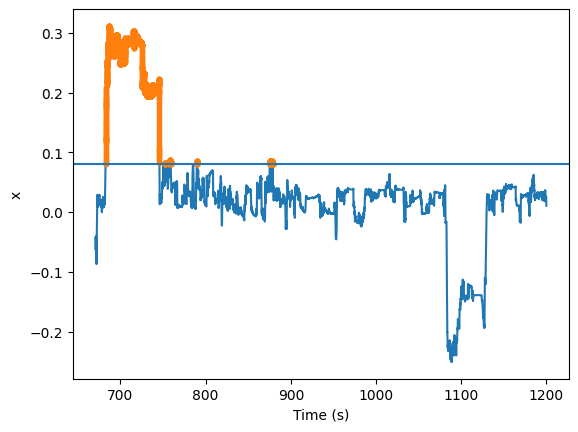

In [23]:
posx = position['x'] #taking the x position

threshold = 0.08

posxpositive = posx.threshold(threshold)

plt.plot(posx.as_units('s'))
plt.plot(posxpositive.as_units('s'), '.')
plt.axhline(threshold)
plt.xlabel("Time (s)")
plt.ylabel("x")

5. IDENTIFYING DATA THAT SATISFIES THE THRESHOLD: The epochs above the threshold can be accessed through the time support of the Tsd object. The time support is an important concept in the pynapple package. It helps the user to define the epochs for which the time serie should be defined. By default, Ts, Tsd and TsGroup objects possess a time support (defined as an IntervalSet). It is recommended to pass the time support when instantiating one of those objects.

In [30]:
epochs_above_thr = posxpositive.time_support
print(epochs_above_thr)

        start         end
0  682.660850  745.565725
1  752.240350  752.440325
2  752.582000  752.673650
3  757.498375  758.998300
4  789.863275  790.271575
5  875.225250  876.066875
6  878.158425  878.641725


6. TUNING CURVE: the tuning curves are computed over 120 bins and between 0 and 2π (.compute_1d_tuning_curves(group;feature;nb_bins;minmax))


In [33]:
tuning_curves = nap.compute_1d_tuning_curves(group=spikes, 
                                             feature=position['ry'],                                              
                                             nb_bins=121, 
                                             minmax=(0, 2*np.pi))

tuning_curves

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0.025964,45.520459,0.0,0.000000,6.207335,6.207335,6.207335,0.0,6.207335,12.414671,2.069112,6.207335,10.345559,14.483782,0.000000,2.069112
0.077891,55.049762,0.0,0.000000,5.504976,3.302986,3.302986,0.0,11.009952,11.009952,2.201990,8.807962,16.514929,1.100995,0.000000,0.000000
0.129818,76.369034,0.0,0.000000,17.144069,4.675655,1.558552,0.0,12.468414,4.675655,1.558552,3.117103,12.468414,9.351310,1.558552,0.000000
0.181745,82.179721,0.0,0.000000,6.522200,1.304440,2.608880,0.0,19.566600,9.131080,0.000000,6.522200,19.566600,9.131080,2.608880,0.000000
0.233672,73.851374,0.0,0.000000,13.187745,5.275098,2.637549,0.0,6.593873,3.956324,1.318775,15.825294,30.331814,7.912647,2.637549,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.049513,15.001060,0.0,0.000000,12.273595,1.363733,15.001060,0.0,0.000000,1.363733,0.000000,8.182397,2.727466,0.000000,0.000000,1.363733
6.101440,22.327159,0.0,0.000000,13.954475,0.000000,11.163580,0.0,8.372685,2.790895,0.000000,2.790895,11.163580,2.790895,0.000000,0.000000
6.153367,47.062150,0.0,0.000000,21.177967,0.000000,7.059322,0.0,2.353107,4.706215,2.353107,7.059322,11.765537,0.000000,2.353107,0.000000
6.205295,56.003958,0.0,2.000141,8.000565,2.000141,10.000707,0.0,8.000565,4.000283,0.000000,14.000990,24.001696,6.000424,0.000000,0.000000


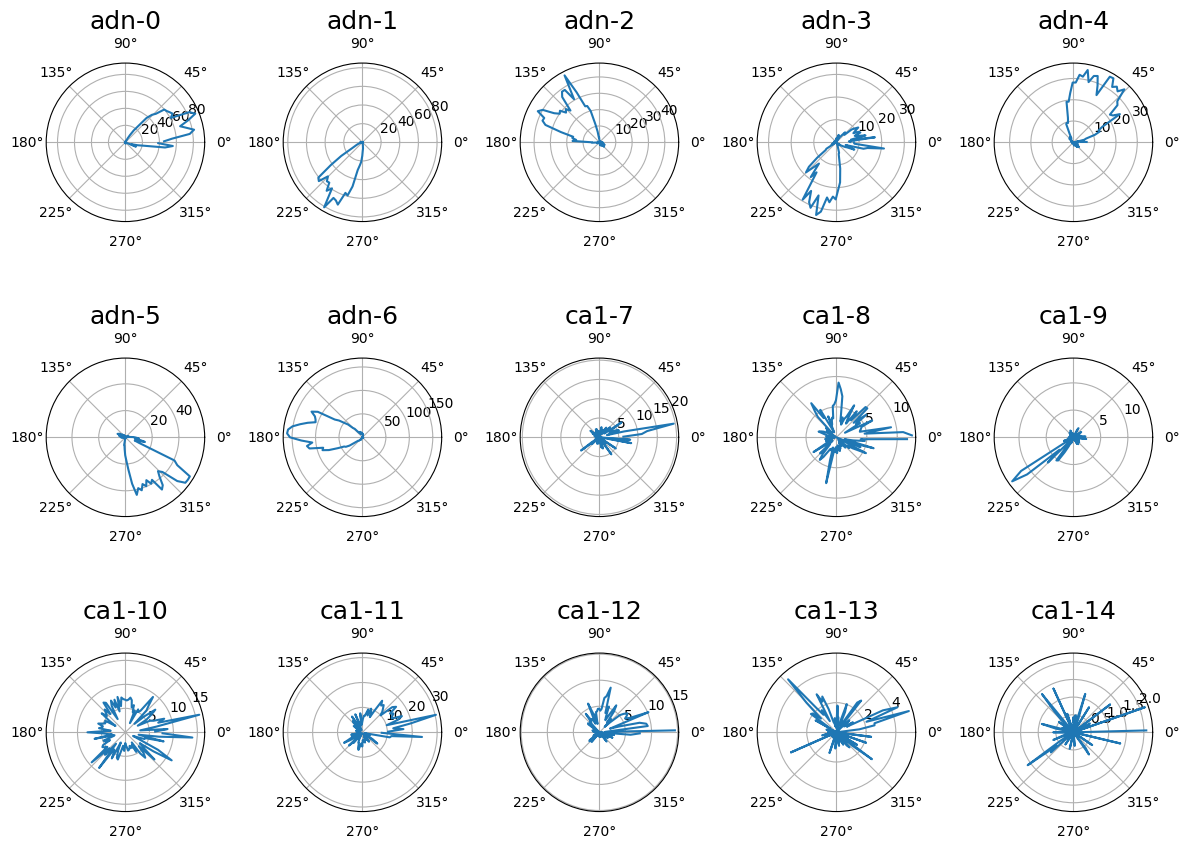

In [34]:
neuron_location = spikes.get_info('location') # to know where the neuron was recorded
plt.figure(figsize=(12,9))

for i,n in enumerate(tuning_curves.columns):
    plt.subplot(3,5,i+1, projection = 'polar')
    plt.plot(tuning_curves[n])
    plt.title(neuron_location[n] + '-' + str(n), fontsize = 18)
    
plt.tight_layout()
plt.show()

7. SORT BY PARAMETER: (.getby_category('___name of category___'))

In [35]:
spikes_by_location = spikes.getby_category('location')

print(spikes_by_location['adn'])
print(spikes_by_location['ca1'])

spikes_adn = spikes_by_location['adn']

  Index    rate    group  location
-------  ------  -------  ----------
      0    7.3         0  adn
      1    5.73        0  adn
      2    8.12        0  adn
      3    6.68        0  adn
      4   10.77        0  adn
      5   11           0  adn
      6   16.52        0  adn
  Index    rate    group  location
-------  ------  -------  ----------
      7    2.2         1  ca1
      8    2.02        1  ca1
      9    1.07        1  ca1
     10    3.92        1  ca1
     11    3.31        1  ca1
     12    1.09        1  ca1
     13    1.28        1  ca1
     14    1.32        1  ca1


CORRELOGRAMS: (.compute_crosscorrelogram)

A classical question with head-direction cells is how pairs stay coordinated across brain states i.e. wake vs sleep

In [36]:
cc_wake = nap.compute_crosscorrelogram(group=spikes_adn,                                        
                                       binsize=20, # ms
                                       windowsize=4000, # ms
                                       ep=epochs['wake'], 
                                       norm=True,
                                       time_units='ms')
                                      
cc_sleep = nap.compute_crosscorrelogram(group=spikes_adn,                                       
                                       binsize=5, # ms
                                       windowsize=400, # ms
                                        ep=epochs['sleep'], 
                                       norm=True,
                                       time_units='ms')

In [39]:
xtwake = cc_wake.index.values #what is .index.values?
xtsleep = cc_sleep.index.values
print(xtwake.shape)
print(xtsleep.shape)

(399,)
(161,)


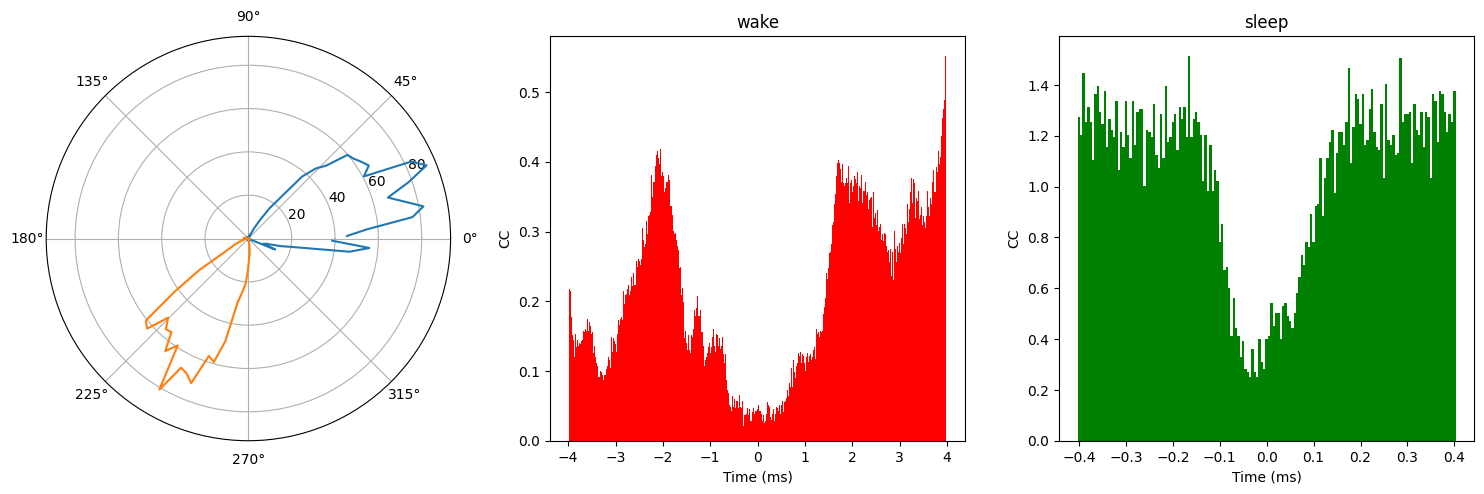

In [47]:
#Tuning curves of neurons 1 and 2
plt.figure(figsize = (15, 5))
plt.subplot(131, projection = 'polar')
plt.plot(tuning_curves[[0,1]]) # The tuning curves of the pair [0,1]
plt.subplot(132)

#Wake cross correlation between neuron 1 and 2
plt.bar(xtwake,cc_wake[(0,1)].values, 0.02, color = 'red') 
plt.title('wake')
plt.xlabel("Time (ms)")
plt.ylabel("CC")
plt.subplot(133)

#Sleep cross correlation between neuron 1 and 2
plt.bar(xtsleep, cc_sleep[(0,1)].values, 0.005, color = 'green') # The wake cross-corr of pair (0,1)
plt.title('sleep')
plt.xlabel("Time (ms)")
plt.ylabel("CC")
plt.tight_layout()
plt.show()


DECODING:

In [48]:
tuning_curves_adn = nap.compute_1d_tuning_curves(spikes_adn,
                                                 position['ry'],
                                                 nb_bins=121,
                                                 minmax=(0, 2*np.pi))

decoded, proba_angle = nap.decode_1d(tuning_curves=tuning_curves_adn, 
                                     group=spikes_adn, 
                                     ep=epochs['wake'],                                 
                                     bin_size=0.3, # second
                                     feature=position['ry'], 
                                    )
print(decoded)

Time (s)
600.15     2.154977
600.45     2.154977
600.75     2.258831
601.05     1.947268
601.35     2.154977
             ...   
1198.65    4.647480
1198.95    4.232063
1199.25    4.543626
1199.55    4.647480
1199.85    3.920500
Length: 2000, dtype: float64


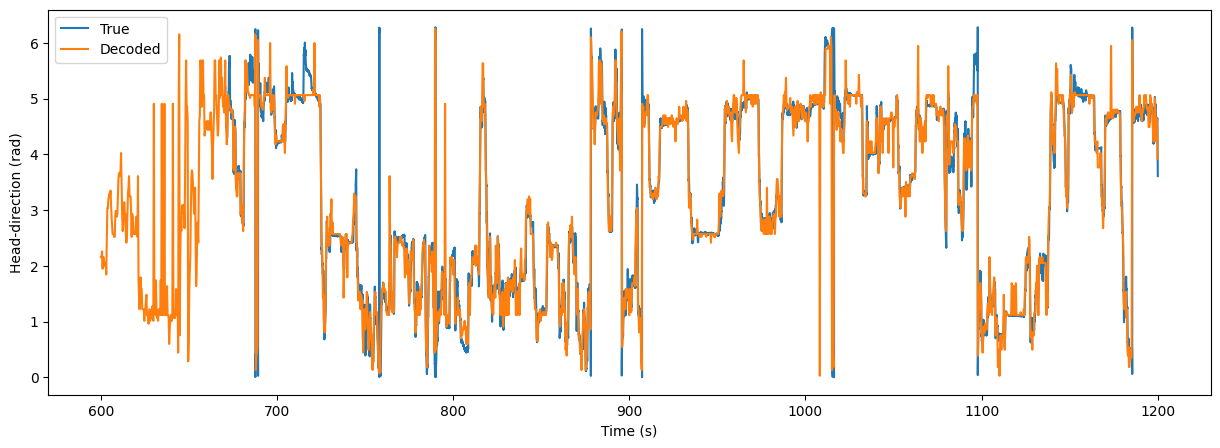

In [49]:
plt.figure(figsize=(15,5))
plt.plot(position['ry'].as_units('s'), label = 'True')
plt.plot(decoded.as_units('s'), label = 'Decoded')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Head-direction (rad)")
plt.show()

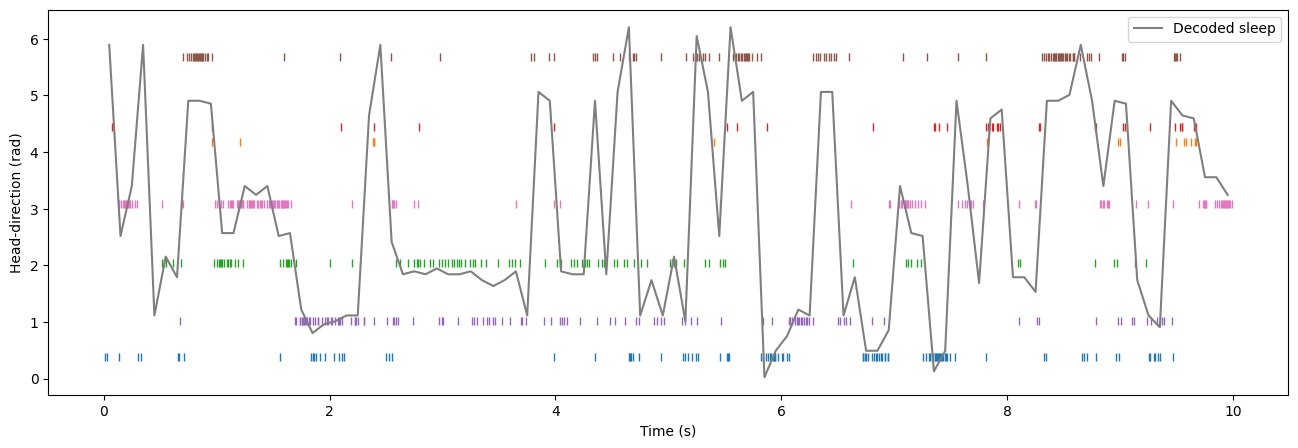

In [50]:
decoded_sleep, proba_angle_Sleep = nap.decode_1d(tuning_curves=tuning_curves_adn,
                                                 group=spikes_adn, 
                                                 ep=epochs['sleep'],
                                                 bin_size=0.1, # second
                                                 feature=position['ry'], 
                                                 )

# Finding quickly max direction of tuning curves
peaks_adn = tuning_curves_adn.idxmax()

# Defining a sub epoch during sleep
subep = nap.IntervalSet(start=0, end=10, time_units='s')

plt.figure(figsize=(16,5))
# create a raster plot
for n in spikes_adn.keys():
    plt.plot(spikes_adn[n].restrict(subep).as_units('s').fillna(peaks_adn[n]), '|')

plt.plot(decoded_sleep.restrict(subep).as_units('s'), label = 'Decoded sleep')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Head-direction (rad)")
plt.show()